In [5]:
# ---- PART-1--EXPLORATORY-DATA-STAGE------------------
#import pandas library, regex, and mat plot lib
import pandas as pd
import matplotlib.pyplot as plt
import re

#read in data from csv files
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Display of Training Data: 

           Index  Sentiment                                               Text
0              0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1              1          0  is upset that he can't update his Facebook by ...
2              2          0  @Kenichan I dived many times for the ball. Man...
3              3          0    my whole body feels itchy and like its on fire 
4              4          0  @nationwideclass no, it's not behaving at all....
...          ...        ...                                                ...
1048570  1048570          1  Back home, thought I'd done for the week, but ...
1048571  1048571          1           My GrandMa is making Dinenr with my Mum 
1048572  1048572          1  Mid-morning snack time... A bowl of cheese noo...
1048573  1048573          1  @ShaDeLa same here  say it like from the Termi...
1048574  1048574          1             @DestinyHope92 im great thaanks  wbuu?

[1048575 rows x 3 colum

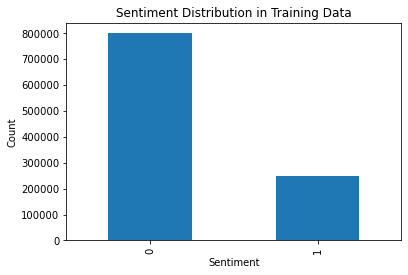


Missing Values in Train Data: 
Index        0
Sentiment    0
Text         0
dtype: int64
Missing Values in Test Data: 
Index        0
Sentiment    0
Text         0
dtype: int64


In [6]:
# Display train and test data
print("Display of Training Data: ")
print()
print(train_data)
print()
print("Display of Testing Data: ")
print()
print(test_data)
print()

# Print the size of training and test data
print("Size of Data: ")
print()
print("Training dataset size:", train_data.shape)
print("Test dataset size:", test_data.shape)

# Analyze sentiment distribution of training data
print()
train_data['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution in Training Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Check training and testing data to see if missing values exist
print()
print("Missing Values in Train Data: ")
print(train_data.isnull().sum())
print("Missing Values in Test Data: ")
print(test_data.isnull().sum())

# Drop values that are null
train_data.dropna(subset=['Text'], inplace=True)
test_data.dropna(subset=['Text'], inplace=True)

In [7]:
# ---- PART-2--TEXT-PREPROCESSING------------------
# Convert text column to all lower case in training and test data
train_data['Text'] = train_data['Text'].str.lower()
test_data['Text'] = test_data['Text'].str.lower()

# Remove non-alphabetical or non-numerical characters
train_data['Text'] = train_data['Text'].apply(lambda x: re.sub(r'\W+', ' ', x))
test_data['Text'] = test_data['Text'].apply(lambda x: re.sub(r'\W+', ' ', x))

# Remove digital numbers
train_data['Text'] = train_data['Text'].apply(lambda x: re.sub(r'\d+', '', x))
test_data['Text'] = test_data['Text'].apply(lambda x: re.sub(r'\d+', '', x))

# Remove extra whitespaces
train_data['Text'] = train_data['Text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
test_data['Text'] = test_data['Text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Print test and training data after preprocessing
print()
print("Train Data after Text Preprocessing: ")
print(train_data)
print()
print("Test Data after Text Preprocessing: ")
print(test_data)


Train Data after Text Preprocessing: 
           Index  Sentiment                                               Text
0              0          0  switchfoot http twitpic com yzl awww that s a ...
1              1          0  is upset that he can t update his facebook by ...
2              2          0  kenichan i dived many times for the ball manag...
3              3          0     my whole body feels itchy and like its on fire
4              4          0  nationwideclass no it s not behaving at all i ...
...          ...        ...                                                ...
1048570  1048570          1  back home thought i d done for the week but ju...
1048571  1048571          1            my grandma is making dinenr with my mum
1048572  1048572          1  mid morning snack time a bowl of cheese noodle...
1048573  1048573          1  shadela same here say it like from the termini...
1048574  1048574          1                  destinyhope im great thaanks wbuu

[1048575 row

In [8]:
# ---- PART-3--LINGUISTIC-FEATURE-EXTRACTION-----------------
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Count vector is created to extract bag-of-words features
count_vect = CountVectorizer()

# Find and extract Bag of Words features
bag_train = count_vect.fit_transform(train_data['Text'])
bag_test = count_vect.transform(test_data['Text'])

# Print Bag of Word Features
print()
print("Bag of Words Features on Training Data")
print(bag_train)
print()
print("Bag of Words Features on Testing Data")
print(bag_test)
print()

# TFIDF vector is created to extract TF-IDF features
tfidf_vect = TfidfVectorizer()

# Find and extract TFIDF features
tfidf_train = tfidf_vect.fit_transform(train_data['Text'])
tfidf_test = tfidf_vect.transform(test_data['Text'])

# Print TFIDF Features
print()
print("TFIDF Features on Training Data")
print(tfidf_train)
print()
print("TFIDF Features on Testing Data")
print(tfidf_test)
print()


Bag of Words Features on Training Data
  (0, 382116)	1
  (0, 168820)	1
  (0, 409286)	1
  (0, 77535)	1
  (0, 445674)	1
  (0, 29779)	1
  (0, 390208)	1
  (0, 55159)	1
  (0, 443707)	1
  (0, 356007)	1
  (0, 150159)	1
  (0, 92346)	1
  (0, 61364)	1
  (0, 289395)	1
  (0, 395312)	1
  (0, 93075)	1
  (0, 399893)	1
  (0, 104522)	1
  (0, 181313)	1
  (1, 390208)	1
  (1, 181313)	1
  (1, 180551)	1
  (1, 415162)	1
  (1, 159664)	1
  (1, 59081)	1
  :	:
  (1048572, 266555)	1
  (1048572, 363370)	1
  (1048572, 67537)	1
  (1048572, 444925)	1
  (1048572, 48891)	1
  (1048572, 285089)	1
  (1048573, 181313)	1
  (1048573, 390562)	1
  (1048573, 228348)	2
  (1048573, 162210)	1
  (1048573, 201961)	1
  (1048573, 138432)	1
  (1048573, 344982)	1
  (1048573, 77712)	1
  (1048573, 341609)	1
  (1048573, 289441)	1
  (1048573, 433583)	1
  (1048573, 267527)	1
  (1048573, 351230)	1
  (1048573, 388882)	1
  (1048574, 175168)	1
  (1048574, 151599)	1
  (1048574, 98165)	1
  (1048574, 389862)	1
  (1048574, 425702)	1

Bag of Words F

In [10]:
# Extract features using Word2Vec
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

# load data
word2vec_train = train_data.head(5000)
sentences = word2vec_train['Text'].apply(nltk.word_tokenize).tolist()
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = model.wv
vector = word_vectors['test']
train_word2vec = word_vectors.most_similar('test', topn=10)

print()
print("First 10 Word2Vec Features in Training Data: ")
print(train_word2vec[:10])
print()

[nltk_data] Downloading package punkt to /Users/meganshah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



First 10 Word2Vec Features in Training Data: 
[('week', 0.997859001159668), ('her', 0.997855544090271), ('hate', 0.9978485703468323), ('not', 0.9978304505348206), ('only', 0.9978172779083252), ('through', 0.9978129267692566), ('u', 0.9978020191192627), ('and', 0.997799813747406), ('though', 0.9977937936782837), ('im', 0.9977924823760986)]



In [6]:
# ---- PART-4--BUILDING-SENTIMENT-MODEL-----------------
# Import statements for machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set y_train and y_test values to sentiment column of database
y_train = train_data['Sentiment'].values
y_test = test_data['Sentiment'].values

# Train Logistic Regression Model on Bag of Words Features
lr_bag = LogisticRegression(random_state=42)
lr_bag.fit(bag_train, y_train)

# Predict test data
lr_y_pred_bag = lr_bag.predict(bag_test)

# Calculate analytics of model
lr_accuracy_bag = accuracy_score(y_test, lr_y_pred_bag)
lr_precision_bag = precision_score(y_test, lr_y_pred_bag, average='binary', pos_label=1)
lr_recall_bag = recall_score(y_test, lr_y_pred_bag, average='binary', pos_label=1)
lr_f1_bag = f1_score(y_test, lr_y_pred_bag, average='binary', pos_label=1)

# Print LR model performance
print('Bag-of-Words Model Performance with Logistic Regression:')
print('Accuracy:', lr_accuracy_bag)
print('Precision:', lr_precision_bag)
print('Recall:', lr_recall_bag)
print('F1-Score:', lr_f1_bag)
print()


Bag-of-Words Model Performance with Logistic Regression:
Accuracy: 0.7465181058495822
Precision: 0.9026548672566371
Recall: 0.5604395604395604
F1-Score: 0.6915254237288136



/Users/meganshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Train Naive Bayes Model on Bag of Words Features
from sklearn.naive_bayes import MultinomialNB
nb_bag = MultinomialNB()
nb_bag.fit(bag_train, y_train)

# Predict Test Data
nb_y_pred_bag = nb_bag.predict(bag_test)

# Calculate analytics of model
nb_accuracy_bag = accuracy_score(y_test, nb_y_pred_bag)
nb_precision_bag = precision_score(y_test, nb_y_pred_bag, average='binary', pos_label=1)
nb_recall_bag = recall_score(y_test, nb_y_pred_bag, average='binary', pos_label=1)
nb_f1_bag = f1_score(y_test, nb_y_pred_bag, average='binary', pos_label=1)

# Print Naive Bayes model performance
print()
print('Bag-of-Words Model Performance with Naive Bayes:')
print('Accuracy:', nb_accuracy_bag)
print('Precision:', nb_precision_bag)
print('Recall:', nb_recall_bag)
print('F1-Score:', nb_f1_bag)
print()


Bag-of-Words Model Performance with Naive Bayes:
Accuracy: 0.6852367688022284
Precision: 0.8415841584158416
Recall: 0.46703296703296704
F1-Score: 0.6007067137809187



In [ ]:
# Train Random Forest Model on Bag of Words Features
rf_bag = RandomForestClassifier()
rf_bag.fit(bag_train, y_train)

# Predict Test Data
rf_y_pred_bag = rf_bag.predict(bag_test)

# Calculate analytics of model
rf_accuracy_bag = accuracy_score(y_test, rf_y_pred_bag)
rf_precision_bag = precision_score(y_test, rf_y_pred_bag, average='binary', pos_label=1)
rf_recall_bag = recall_score(y_test, rf_y_pred_bag, average='binary', pos_label=1)
rf_f1_bag = f1_score(y_test, rf_y_pred_bag, average='binary', pos_label=1)

# Print Random Forest model performance
print()
print('Bag-of-Words Model Performance with Random Forest:')
print('Accuracy:', rf_accuracy_bag)
print('Precision:', rf_precision_bag)
print('Recall:', rf_recall_bag)
print('F1-Score:', rf_f1_bag)
print()

In [ ]:
# Train SVM Model on Bag of Words Features
svc_bag = SVC(kernel='linear')
svc_bag.fit(bag_train, y_train)

# Predict Test Data
svc_y_pred_bag = svc_bag.predict(bag_test)

# Calculate analytics of model
svc_accuracy_bag = accuracy_score(y_test, svc_y_pred_bag)
svc_precision_bag = precision_score(y_test, svc_y_pred_bag, average='binary', pos_label=1)
svc_recall_bag = recall_score(y_test, svc_y_pred_bag, average='binary', pos_label=1)
svc_f1_bag = f1_score(y_test, svc_y_pred_bag, average='binary', pos_label=1)

# Print SVC model performance
print()
print('Bag-of-Words Model Performance with SVC:')
print('Accuracy:', svc_accuracy_bag)
print('Precision:', svc_precision_bag)
print('Recall:', svc_recall_bag)
print('F1-Score:', svc_f1_bag)
print()

In [ ]:
# Train Logistic Regression Model on TFIDF Features
lr_tfidf = LogisticRegression(random_state=42)
lr_tfidf.fit(tfidf_train, y_train)

# Predict test data
lr_y_pred_tfidf = lr_tfidf.predict(tfidf_test)

# Calculate analytics of model
lr_accuracy_tfidf = accuracy_score(y_test, lr_y_pred_tfidf)
lr_precision_tfidf = precision_score(y_test, lr_y_pred_tfidf, average='binary', pos_label=1)
lr_recall_tfidf = recall_score(y_test, lr_y_pred_tfidf, average='binary', pos_label=1)
lr_f1_tfidf = f1_score(y_test, lr_y_pred_tfidf, average='binary', pos_label=1)

# Print LR model performance
print('TFIDF Model Performance with Logistic Regression:')
print('Accuracy:', lr_accuracy_tfidf)
print('Precision:', lr_precision_tfidf)
print('Recall:', lr_recall_tfidf)
print('F1-Score:', lr_f1_tfidf)
print()

In [ ]:
# Train Naive Bayes Model on Bag of Words Features
from sklearn.naive_bayes import MultinomialNB
nb_tfidf = MultinomialNB()
nb_tfidf.fit(tfidf_train, y_train)

# Predict Test Data
nb_y_pred_tfidf = nb_tfidf.predict(tfidf_test)

# Calculate analytics of model
nb_accuracy_tfidf = accuracy_score(y_test, nb_y_pred_tfidf)
nb_precision_tfidf = precision_score(y_test, nb_y_pred_tfidf, average='binary', pos_label=1)
nb_recall_tfidf = recall_score(y_test, nb_y_pred_tfidf, average='binary', pos_label=1)
nb_f1_tfidf = f1_score(y_test, nb_y_pred_tfidf, average='binary', pos_label=1)

# Print Naive Bayes model performance
print()
print('TFIDF Model Performance with Naive Bayes:')
print('Accuracy:', nb_accuracy_tfidf)
print('Precision:', nb_precision_tfidf)
print('Recall:', nb_recall_tfidf)
print('F1-Score:', nb_f1_tfidf)
print()

In [ ]:
# Train SVM Model on TFIDF Features
svc_tfidf = SVC(kernel='linear')
svc_tfidf.fit(tfidf_train, y_train)

# Predict Test Data
svc_y_pred_tfidf = svc_bag.predict(tfidf_test)

# Calculate analytics of model
svc_accuracy_tfidf = accuracy_score(y_test, svc_y_pred_tfidf)
svc_precision_tfidf = precision_score(y_test, svc_y_pred_tfidf, average='binary', pos_label=1)
svc_recall_tfidf = recall_score(y_test, svc_y_pred_tfidf, average='binary', pos_label=1)
svc_f1_tfidf = f1_score(y_test, svc_y_pred_tfidf, average='binary', pos_label=1)

# Print SVC model performance
print()
print('TFIDF Model Performance with SVC:')
print('Accuracy:', svc_accuracy_tfidf)
print('Precision:', svc_precision_tfidf)
print('Recall:', svc_recall_tfidf)
print('F1-Score:', svc_f1_tfidf)
print()